In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached contourpy-1.2.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.51.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (159 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 26.9 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached contourpy-1.2.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (309 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Creating constants
POINST_FILENAME_SCENARIO_0 = "monte-carlo-simulation-points-0_42_30_6_0.500000.csv"
RESULTS_FILENAME_SCENARIO_0 = "monte-carlo-simulation-results-0_42_30_6_0.500000.csv"
POINST_FILENAME_SCENARIO_1 = "monte-carlo-simulation-points-1_42_30_6_0.500000.csv"
RESULTS_FILENAME_SCENARIO_1 = "monte-carlo-simulation-results-1_42_30_6_0.500000.csv"

R=6

In [3]:
results_s0_df = pd.read_csv('./../'+RESULTS_FILENAME_SCENARIO_0)
points_s0_df = pd.read_csv('./../'+POINST_FILENAME_SCENARIO_0)
results_s1_df = pd.read_csv('./../'+RESULTS_FILENAME_SCENARIO_1)
points_s1_df = pd.read_csv('./../'+POINST_FILENAME_SCENARIO_1)

In [4]:
results_s0_df.describe()

,scenario,number-of-points(k),number-of-runs(r),run-id(rid),radius,seed,mean,variance,stdDeviation
count,1111110.0,1111110.0,1.111110e+06,1.111110e+06,1111110.0,1111110.0,1.111110e+06,1.111110e+06,1.111110e+06
mean,1.0,30.0,5.888895e+00,4.545454e+05,0.5,42.0,3.333767e-01,1.388691e-02,1.171042e-01
std,0.0,0.0,3.513131e-01,3.060861e+05,0.0,0.0,2.155048e-02,3.073650e-03,1.317247e-02
min,1.0,30.0,1.000000e+00,0.000000e+00,0.5,42.0,2.282000e-01,2.880000e-03,5.366300e-02
25%,1.0,30.0,6.000000e+00,1.666672e+05,0.5,42.0,3.189893e-01,1.174300e-02,1.083650e-01
50%,1.0,30.0,6.000000e+00,4.444445e+05,0.5,42.0,3.337590e-01,1.377800e-02,1.173810e-01
75%,1.0,30.0,6.000000e+00,7.222218e+05,0.5,42.0,3.481590e-01,1.591600e-02,1.261590e-01
max,1.0,30.0,6.000000e+00,9.999990e+05,0.5,42.0,4.236550e-01,3.211000e-02,1.791930e-01


In [5]:
points_s0_df.describe()

,scenario,number-of-points(k),number-of-runs(r),run-id(rid),radius,seed,x,y,distance
count,33333300.0,33333300.0,3.333330e+07,3.333330e+07,33333300.0,33333300.0,3.333330e+07,3.333330e+07,3.333330e+07
mean,1.0,30.0,5.888895e+00,4.545454e+05,0.5,42.0,6.352051e-05,2.860492e-05,3.333767e-01
std,0.0,0.0,3.513130e-01,3.060860e+05,0.0,0.0,2.500308e-01,2.500261e-01,1.178492e-01
min,1.0,30.0,1.000000e+00,0.000000e+00,0.5,42.0,-4.999960e-01,-4.999950e-01,6.400000e-05
25%,1.0,30.0,6.000000e+00,1.666670e+05,0.5,42.0,-2.019940e-01,-2.020230e-01,2.500760e-01
50%,1.0,30.0,6.000000e+00,4.444445e+05,0.5,42.0,1.010000e-04,3.500000e-05,3.536310e-01
75%,1.0,30.0,6.000000e+00,7.222220e+05,0.5,42.0,2.021030e-01,2.020350e-01,4.330580e-01
max,1.0,30.0,6.000000e+00,9.999990e+05,0.5,42.0,4.999830e-01,4.999990e-01,5.000000e-01


In [6]:
results_s1_df.describe()

,scenario,number-of-points(k),number-of-runs(r),run-id(rid),radius,seed,mean,variance,stdDeviation
count,1111110.0,1111110.0,1.111110e+06,1.111110e+06,1111110.0,1111110.0,1.111110e+06,1.111110e+06,1.111110e+06
mean,1.0,30.0,5.888895e+00,4.545454e+05,0.5,42.0,2.500361e-01,2.082883e-02,1.437910e-01
std,0.0,0.0,3.513131e-01,3.060861e+05,0.0,0.0,2.637284e-02,3.542475e-03,1.236871e-02
min,1.0,30.0,1.000000e+00,0.000000e+00,0.5,42.0,1.322670e-01,5.496000e-03,7.413700e-02
25%,1.0,30.0,6.000000e+00,1.666672e+05,0.5,42.0,2.321730e-01,1.839100e-02,1.356120e-01
50%,1.0,30.0,6.000000e+00,4.444445e+05,0.5,42.0,2.500500e-01,2.076100e-02,1.440870e-01
75%,1.0,30.0,6.000000e+00,7.222218e+05,0.5,42.0,2.679240e-01,2.319100e-02,1.522860e-01
max,1.0,30.0,6.000000e+00,9.999990e+05,0.5,42.0,3.794530e-01,3.856000e-02,1.963660e-01


In [7]:
points_s1_df.describe()

,scenario,number-of-points(k),number-of-runs(r),run-id(rid),radius,seed,x,y,distance
count,33333300.0,33333300.0,3.333330e+07,3.333330e+07,33333300.0,33333300.0,3.333330e+07,3.333330e+07,3.333330e+07
mean,1.0,30.0,5.888895e+00,4.545454e+05,0.5,42.0,4.110043e-05,-3.359274e-05,2.500361e-01
std,0.0,0.0,3.513130e-01,3.060860e+05,0.0,0.0,2.041440e-01,2.041405e-01,1.443262e-01
min,1.0,30.0,1.000000e+00,0.000000e+00,0.5,42.0,-4.999910e-01,-4.999850e-01,0.000000e+00
25%,1.0,30.0,6.000000e+00,1.666670e+05,0.5,42.0,-1.291170e-01,-1.292430e-01,1.250520e-01
50%,1.0,30.0,6.000000e+00,4.444445e+05,0.5,42.0,8.000000e-06,-9.000000e-06,2.500500e-01
75%,1.0,30.0,6.000000e+00,7.222220e+05,0.5,42.0,1.291890e-01,1.291510e-01,3.750160e-01
max,1.0,30.0,6.000000e+00,9.999990e+05,0.5,42.0,4.999950e-01,4.999980e-01,5.000000e-01


In [16]:
def getExperimentSample(df:pd.DataFrame, r:int) -> pd.DataFrame:
    filtered_df = df[df['number-of-runs(r)'] == r]
    sampled_df = filtered_df.sample(n=filtered_df['number-of-points(k)'].iloc[0], random_state=1)
    
    return sampled_df

def getExperimentResults(df:pd.DataFrame, r:int) -> pd.DataFrame:
    filtered_df = df[df['number-of-runs(r)'] == r]
    
    return filtered_df

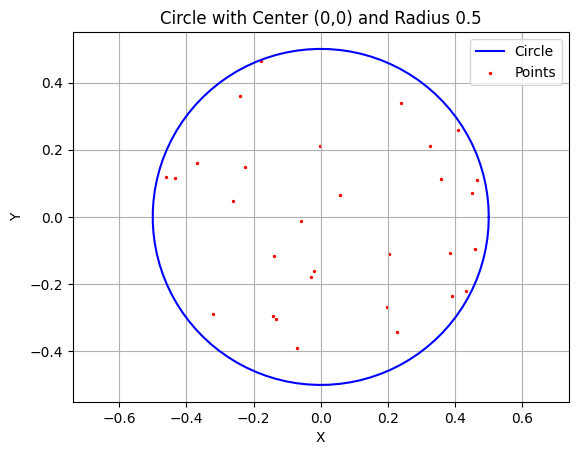

In [12]:
# Assuming you have already read the CSV file and stored it in points_df

points_df = getExperimentSample(points_s0_df, R)

# Extract radius from DataFrame
radius = points_df['radius'].iloc[0]

# Create data points to plot the circle
theta = np.linspace(0, 2*np.pi, 100)
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the circle with center (0,0)
ax.plot(x_circle, y_circle, label='Circle', color='b')

# Plot the points (optional)
ax.scatter(points_df['x'], points_df['y'], color='r', label='Points', s=2)

# Set plot limits based on the maximum absolute value of x and y coordinates
max_range = max(np.abs(points_df[['x', 'y']].values).max(), radius)
ax.set_xlim(-max_range, max_range)
ax.set_ylim(-max_range, max_range)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Circle with Center (0,0) and Radius {}'.format(radius))

# Add legend (optional)
ax.legend()

# Show the plot
plt.grid(True)
plt.axis('equal')  # Equal aspect ratio ensures the circle is circular
plt.show()

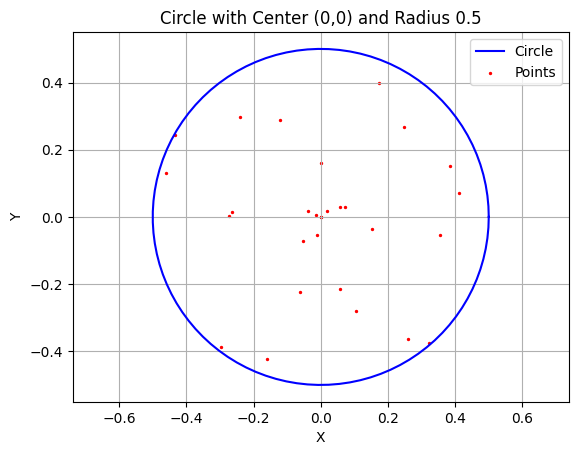

In [13]:
# Assuming you have already read the CSV file and stored it in points_df

points_df = getExperimentSample(points_s1_df, R)

# Extract radius from DataFrame
radius = points_df['radius'].iloc[0]

# Create data points to plot the circle
theta = np.linspace(0, 2*np.pi, 100)
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the circle with center (0,0)
ax.plot(x_circle, y_circle, label='Circle', color='b')

# Plot the points (optional)
ax.scatter(points_df['x'], points_df['y'], color='r', label='Points', s=2)

# Set plot limits based on the maximum absolute value of x and y coordinates
max_range = max(np.abs(points_df[['x', 'y']].values).max(), radius)
ax.set_xlim(-max_range, max_range)
ax.set_ylim(-max_range, max_range)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Circle with Center (0,0) and Radius {}'.format(radius))

# Add legend (optional)
ax.legend()

# Show the plot
plt.grid(True)
plt.axis('equal')  # Equal aspect ratio ensures the circle is circular
plt.show()

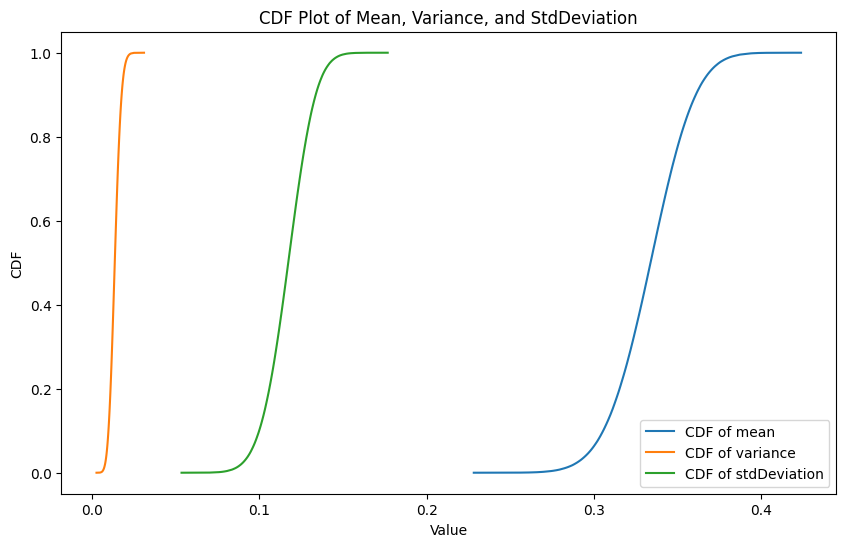

In [18]:
results_df = getExperimentResults(results_s0_df, R)

results_df_sorted = results_df.sort_values(by='run-id(rid)')

# Define the columns to plot
columns_to_plot = ['mean', 'variance', 'stdDeviation']

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot CDF for each column
for column in columns_to_plot:
    sorted_data = np.sort(results_df_sorted[column])
    yvals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, yvals, label=f"CDF of {column}")

# Add labels and title
plt.xlabel("Value")
plt.ylabel("CDF")
plt.title("CDF Plot of Mean, Variance, and StdDeviation")
plt.legend()

# Show the plot
plt.show()

1000000


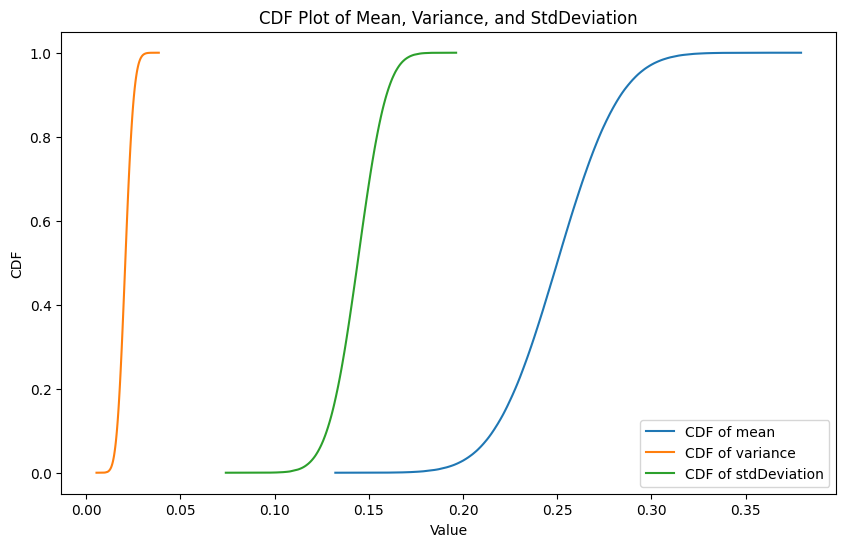

In [20]:
results_df = getExperimentResults(results_s1_df, R)

results_df_sorted = results_df.sort_values(by='run-id(rid)')

# Define the columns to plot
columns_to_plot = ['mean', 'variance', 'stdDeviation']

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot CDF for each column
for column in columns_to_plot:
    sorted_data = np.sort(results_df_sorted[column])
    yvals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, yvals, label=f"CDF of {column}")

# Add labels and title
plt.xlabel("Value")
plt.ylabel("CDF")
plt.title("CDF Plot of Mean, Variance, and StdDeviation")
plt.legend()

# Show the plot
plt.show()

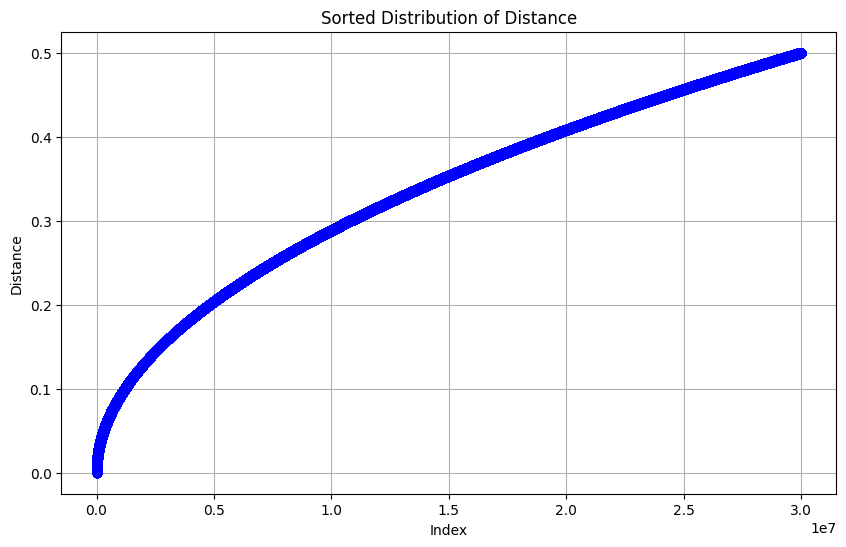

In [23]:
# Sort the 'distance' column
points_df = getExperimentResults(points_s0_df, R)

sorted_distance = points_df['distance'].sort_values().reset_index(drop=True)

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the sorted 'distance' values
plt.plot(sorted_distance, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Distance")
plt.title("Sorted Distribution of Distance")
plt.grid(True)

# Show the plot
plt.show()

In [26]:
# Sort the 'distance' column
points_df = getExperimentResults(points_s1_df, R)

sorted_distance = points_df['distance'].sort_values().reset_index(drop=True)

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the sorted 'distance' values
plt.plot(sorted_distance, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Distance")
plt.title("Sorted Distribution of Distance")
plt.grid(True)

# Show the plot
plt.show()

KeyError: 'distance'

<Figure size 1000x600 with 0 Axes>